In [1]:
!pip install vectorbt
!pip install yfinance
!pip install pandas_ta

In [2]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import vectorbt as vbt
import yfinance as yf
import matplotlib.pyplot as plt

In [100]:
df = yf.download(tickers='BTC-USD', period="730d", interval = '1h')
df.head()

[*********************100%***********************]  1 of 1 completed


Open          High           Low         Close  \
2021-01-06 00:00:00  34013.613281  34083.238281  33514.035156  34023.480469   
2021-01-06 01:00:00  34015.718750  34015.718750  33663.500000  33871.859375   
2021-01-06 02:00:00  33869.843750  34148.835938  33869.843750  33944.250000   
2021-01-06 03:00:00  33942.164062  34104.082031  33829.312500  34104.082031   
2021-01-06 04:00:00  34112.726562  35587.656250  34112.726562  35483.207031   

                        Adj Close      Volume  
2021-01-06 00:00:00  34023.480469           0  
2021-01-06 01:00:00  33871.859375   321171456  
2021-01-06 02:00:00  33944.250000    60096512  
2021-01-06 03:00:00  34104.082031           0  
2021-01-06 04:00:00  35483.207031  3729707008

In [101]:
data = yf.download(tickers='BTC-USD', period="730d", interval = '1h')
data.head()

[*********************100%***********************]  1 of 1 completed


Open          High           Low         Close  \
2021-01-06 00:00:00  34013.613281  34083.238281  33514.035156  34023.480469   
2021-01-06 01:00:00  34015.718750  34015.718750  33663.500000  33871.859375   
2021-01-06 02:00:00  33869.843750  34148.835938  33869.843750  33944.250000   
2021-01-06 03:00:00  33942.164062  34104.082031  33829.312500  34104.082031   
2021-01-06 04:00:00  34112.726562  35587.656250  34112.726562  35483.207031   

                        Adj Close      Volume  
2021-01-06 00:00:00  34023.480469           0  
2021-01-06 01:00:00  33871.859375   321171456  
2021-01-06 02:00:00  33944.250000    60096512  
2021-01-06 03:00:00  34104.082031           0  
2021-01-06 04:00:00  35483.207031  3729707008

In [102]:
data.tail()

Open          High           Low         Close  \
2023-01-05 13:00:00  16831.501953  16831.501953  16799.576172  16801.863281   
2023-01-05 14:00:00  16801.365234  16835.707031  16790.283203  16835.707031   
2023-01-05 15:00:00  16836.318359  16878.757812  16828.843750  16854.464844   
2023-01-05 16:00:00  16854.421875  16873.857422  16839.078125  16841.345703   
2023-01-05 16:40:00  16838.931641  16838.931641  16838.931641  16838.931641   

                        Adj Close     Volume  
2023-01-05 13:00:00  16801.863281  375865344  
2023-01-05 14:00:00  16835.707031  349372416  
2023-01-05 15:00:00  16854.464844  160131072  
2023-01-05 16:00:00  16841.345703   49351680  
2023-01-05 16:40:00  16838.931641          0

<AxesSubplot:>

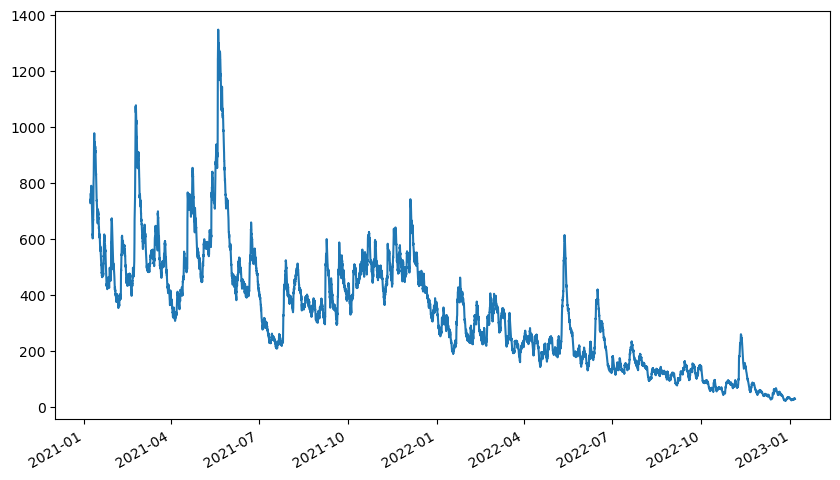

In [103]:
# atr
data.ta.atr(50).plot(figsize=(10,6))

In [104]:
data.ta.atr().mean()

334.78513766189076

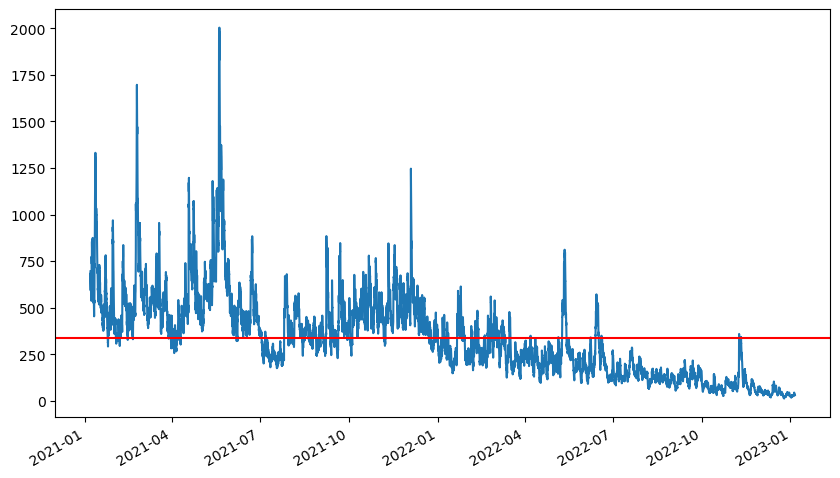

In [105]:
data.ta.atr().plot(figsize=(10,6))
plt.axhline(data.ta.atr().mean(),color='red')

# zoom in 2022 + for focus atr

In [106]:
df = data.loc['2022-02':].copy()

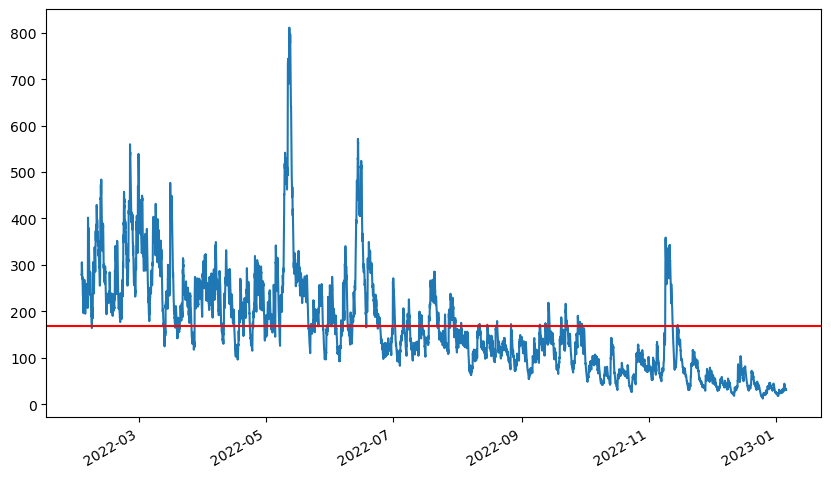

In [107]:
df.ta.atr().plot(figsize=(10,6))
plt.axhline(df.ta.atr().mean(),color='red')

In [108]:
df.ta.atr(append=True)

2022-02-01 00:00:00          NaN
2022-02-01 01:00:00          NaN
2022-02-01 02:00:00          NaN
2022-02-01 03:00:00          NaN
2022-02-01 04:00:00          NaN
                         ...    
2023-01-05 13:00:00    30.147680
2023-01-05 14:00:00    31.238833
2023-01-05 15:00:00    32.572778
2023-01-05 16:00:00    32.730387
2023-01-05 16:40:00    30.564935
Name: ATRr_14, Length: 8130, dtype: float64

In [109]:
df['ATRr_14'].mean()

168.34318416949785

In [110]:
df['ATRr_14'].std()

109.07280672436968

In [111]:
# find out std to plot with atr

In [112]:
df['atr_cap'] = df['ATRr_14'].mean() + 3* df['ATRr_14'].std()

<AxesSubplot:>

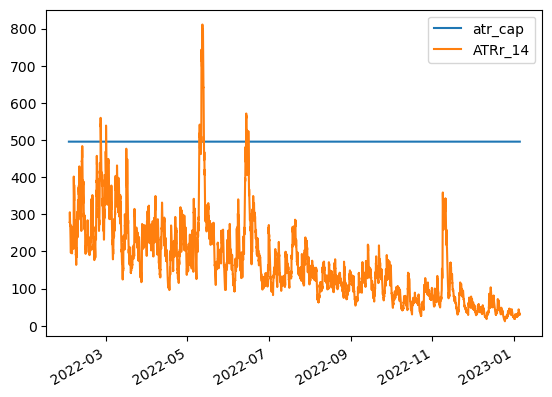

In [113]:
df.plot(y=['atr_cap','ATRr_14'])

In [114]:
df['atr_cap'] = df['ATRr_14'].rolling(200).mean() + 2* df['ATRr_14'].rolling(200).std()

<AxesSubplot:>

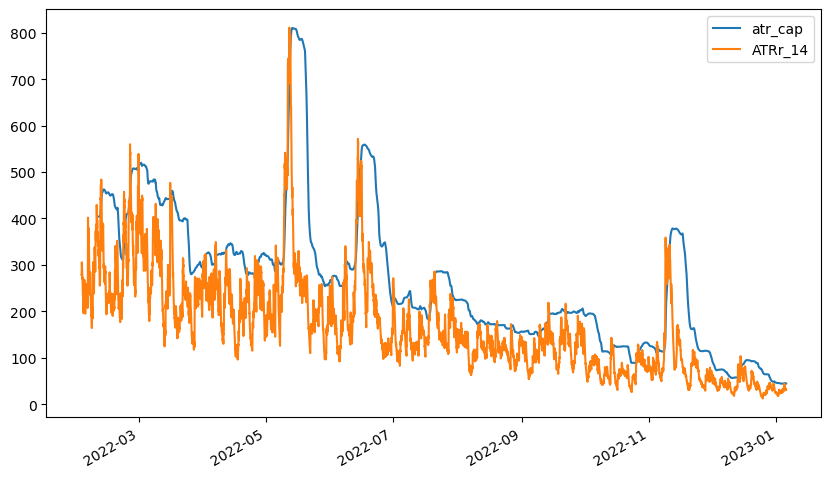

In [115]:
df.plot(y=['atr_cap','ATRr_14'],figsize=(10,6))

In [116]:
df['atr_cap'] = df['ATRr_14'].ewm(alpha=0.04,adjust=False).mean() + 3* df['ATRr_14'].ewm(alpha=0.04,adjust=False).std()

<AxesSubplot:>

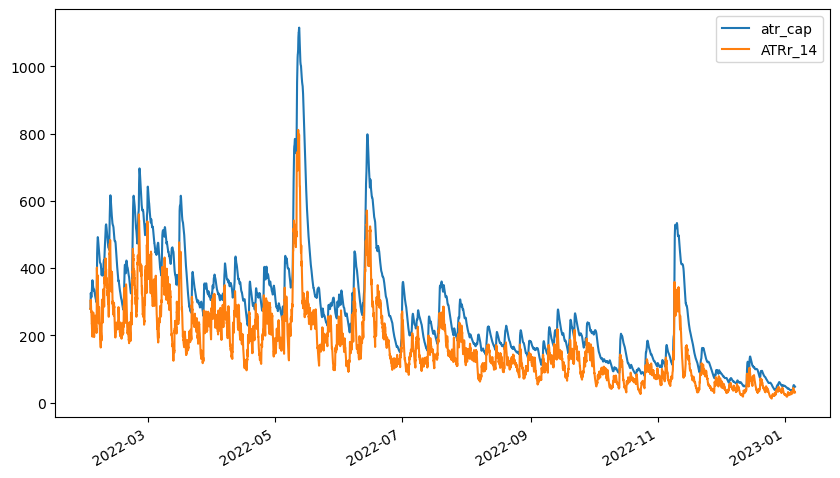

In [117]:
df.plot(y=['atr_cap','ATRr_14'],figsize=(10,6))

In [118]:
df['atr_cap'] = df['ATRr_14'].ewm(span=60,adjust=False).mean() + 3* df['ATRr_14'].ewm(span=60,adjust=False).std()

<AxesSubplot:>

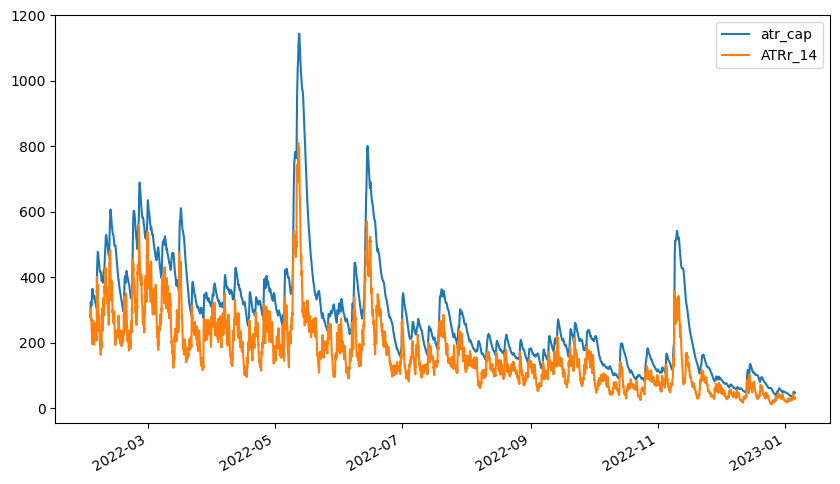

In [119]:
df.plot(y=['atr_cap','ATRr_14'],figsize=(10,6))

In [120]:
df[df['ATRr_14']>df['atr_cap']]

Open          High           Low         Close  \
2022-02-04 15:00:00  37923.496094  39624.484375  37923.496094  39483.742188   
2022-02-04 16:00:00  39487.347656  40429.507812  39487.347656  40388.105469   
2022-03-16 03:00:00  40823.171875  40866.406250  39122.675781  39178.570312   
2022-05-05 15:00:00  38200.820312  38203.410156  36804.117188  36914.738281   
2022-06-30 23:00:00  18890.511719  19786.396484  18887.570312  19786.396484   
2022-07-01 00:00:00  19878.185547  20632.671875  19705.644531  20320.039062   
2022-09-13 12:00:00  22538.457031  22673.820312  21485.324219  21514.345703   
2022-10-13 15:00:00  18438.375000  18966.025391  18425.480469  18925.740234   
2022-11-04 15:00:00  21189.302734  21209.560547  20921.986328  20921.986328   
2022-11-08 04:00:00  20204.888672  20233.708984  19677.072266  19677.072266   
2022-11-08 17:00:00  20417.388672  20417.388672  19466.865234  19466.865234   
2022-11-08 18:00:00  19466.388672  19466.388672  18712.837891  18712.837891   
2022-11-08 19:00:00  18709.109375  18709.109375  17603.544922  18372.054688   
2022-12-13 13:00:00  17424.031250  17901.916016  17412.193359  17887.537109   
2022-12-13 14:00:00  17888.316406  17930.085938  17847.796875  17866.691406   
2023-01-04 19:00:00  16955.822266  16960.177734  16821.509766  16842.033203   

                        Adj Close       Volume     ATRr_14     atr_cap  
2022-02-04 15:00:00  39483.742188   4199303168  359.627963  336.842927  
2022-02-04 16:00:00  40388.105469            0  401.556635  374.442710  
2022-03-16 03:00:00  39178.570312   2255732736  476.525433  437.508044  
2022-05-05 15:00:00  36914.738281   5904736256  302.062480  295.655591  
2022-06-30 23:00:00  19786.396484   2010312704  213.811799  206.843028  
2022-07-01 00:00:00  20320.039062   3028836352  264.755767  238.377108  
2022-09-13 12:00:00  21514.345703   3786162176  208.575842  208.033182  
2022-10-13 15:00:00  18925.740234   3675006976  129.569570  124.552819  
2022-11-04 15:00:00  20921.986328   1107906560  126.598962  125.225551  
2022-11-08 04:00:00  19677.072266   5783101440  143.476103  140.170476  
2022-11-08 17:00:00  19466.865234   4880359424  260.355483  248.039389  
2022-11-08 18:00:00  18712.837891   9734979584  295.617759  285.265371  
2022-11-08 19:00:00  18372.054688  11296194560  353.737416  334.355674  
2022-12-13 13:00:00  17887.537109   3560720384   80.989322   70.411965  
2022-12-13 14:00:00  17866.691406    730726400   81.082160   79.224512  
2023-01-04 19:00:00  16842.033203    993354752   43.926241   43.187288

In [121]:
# Initial Indicator
df['fast_ema'] = df.ta.ema(12)
df['slow_ema'] = df.ta.ema(26)
df['trend_ema'] = df.ta.ema(50)

# Define Signal
long_trigger = df['fast_ema'].vbt.crossed_above(df['slow_ema']) # Condition 1
long_filter = df['fast_ema'] > df['trend_ema'] # Condition 2

short_trigger = df['fast_ema'].vbt.crossed_below(df['slow_ema']) # Condition 1
short_filter = df['fast_ema'] < df['trend_ema'] # Condition 2

In [122]:
(long_trigger & long_filter)

2022-02-01 00:00:00    False
2022-02-01 01:00:00    False
2022-02-01 02:00:00    False
2022-02-01 03:00:00    False
2022-02-01 04:00:00    False
                       ...  
2023-01-05 13:00:00    False
2023-01-05 14:00:00    False
2023-01-05 15:00:00    False
2023-01-05 16:00:00    False
2023-01-05 16:40:00    False
Length: 8130, dtype: bool

In [123]:
(long_trigger & long_filter).sum()

40

In [124]:
long_comb_entry = long_trigger & long_filter
short_comb_entry = short_trigger & short_filter
long_comb_entry[long_comb_entry==True]

2022-02-08 21:00:00    True
2022-02-09 06:00:00    True
2022-02-09 12:00:00    True
2022-02-16 20:00:00    True
2022-02-27 11:00:00    True
2022-03-15 16:00:00    True
2022-03-18 16:00:00    True
2022-03-23 15:00:00    True
2022-05-17 03:00:00    True
2022-05-17 21:00:00    True
2022-06-08 13:00:00    True
2022-06-27 09:00:00    True
2022-07-05 19:00:00    True
2022-07-16 14:00:00    True
2022-07-18 05:00:00    True
2022-07-22 00:00:00    True
2022-07-22 06:00:00    True
2022-08-05 21:00:00    True
2022-08-07 17:00:00    True
2022-08-12 20:00:00    True
2022-08-15 02:00:00    True
2022-08-24 06:00:00    True
2022-08-24 12:00:00    True
2022-08-31 21:00:00    True
2022-09-06 00:00:00    True
2022-09-29 16:00:00    True
2022-09-29 19:00:00    True
2022-10-23 14:00:00    True
2022-10-24 21:00:00    True
2022-10-25 13:00:00    True
2022-10-28 16:00:00    True
2022-11-26 00:00:00    True
2022-11-27 07:00:00    True
2022-12-02 21:00:00    True
2022-12-04 05:00:00    True
2022-12-04 14:00:00 

In [125]:
long_entries = long_comb_entry
long_exits = short_comb_entry
short_entries = short_comb_entry
short_exits = long_comb_entry

In [126]:
# Run
port = vbt.Portfolio.from_signals(df.Close,
                                       entries = long_entries,
                                       exits = long_exits,
                                       short_entries = short_entries,
                                       short_exits = short_exits,
                                       freq = '1h',
                                       init_cash = 10000,
                                       #sl_stop= df['sl_stop'],
                                       fees = 0.0007,
                                       slippage = 0.0005)

<AxesSubplot:>

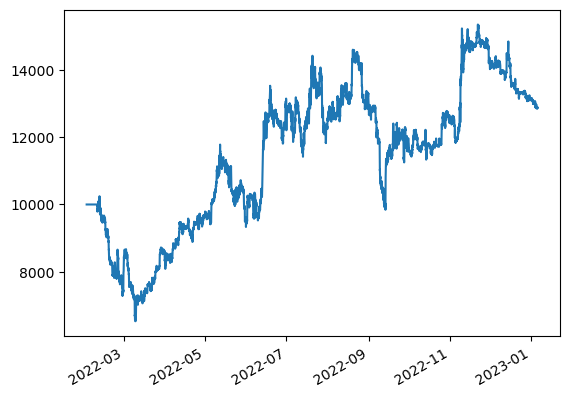

In [127]:
port.value().plot()

In [128]:
port.stats()

Start                               2022-02-01 00:00:00
End                                 2023-01-05 16:40:00
Period                                338 days 18:00:00
Start Value                                     10000.0
End Value                                  12886.207261
Total Return [%]                              28.862073
Benchmark Return [%]                         -56.081579
Max Gross Exposure [%]                            100.0
Total Fees Paid                              631.079742
Max Drawdown [%]                              36.308701
Max Drawdown Duration                  86 days 05:00:00
Total Trades                                         39
Total Closed Trades                                  38
Total Open Trades                                     1
Open Trade PnL                               -14.212439
Win Rate [%]                                  26.315789
Best Trade [%]                                33.556479
Worst Trade [%]                              -13

In [129]:
# Define Signal กันเพิ่มหน่อย
# 1. ออกเมื่ือเส้น fast ตัดเส้น slow
# 2. ออกเมื่อ ATR ทะลุ 2 std

df['atr'] = df.ta.atr()
sma = df['atr'].rolling(100).mean()
std = df['atr'].rolling(100).std()
df['atr_upperband'] = sma + std * 2



In [130]:
atr_exit = df['atr']>df['atr_upperband']
exitshort_1 = df['fast_ema'].vbt.crossed_above(df['slow_ema'])
exitlong_1 = df['fast_ema'].vbt.crossed_below(df['slow_ema'])

# Exit signal
long_exits = exitlong_1 | atr_exit
short_exits = exitshort_1 | atr_exit

In [131]:
# Run
port = vbt.Portfolio.from_signals(df.Close,
                                       entries = long_entries,
                                       exits = long_exits,
                                       short_entries = short_entries,
                                       short_exits = short_exits,
                                       freq = '1h',
                                       init_cash = 10000,
                                       #sl_stop= df['sl_stop'],
                                       fees = 0.001,
                                       slippage = 0.001)

<AxesSubplot:>

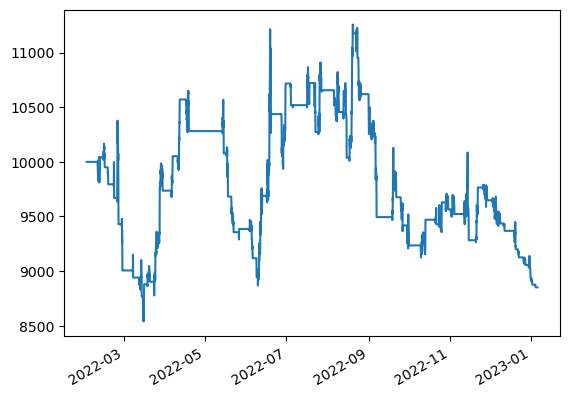

In [132]:
port.value().plot()

In [133]:
port.stats()

Start                         2022-02-01 00:00:00
End                           2023-01-05 16:40:00
Period                          338 days 18:00:00
Start Value                               10000.0
End Value                             8851.010809
Total Return [%]                       -11.489892
Benchmark Return [%]                   -56.081579
Max Gross Exposure [%]                      100.0
Total Fees Paid                       1867.207468
Max Drawdown [%]                        21.376908
Max Drawdown Duration           138 days 18:00:00
Total Trades                                   96
Total Closed Trades                            96
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                                 25.0
Best Trade [%]                          11.360582
Worst Trade [%]                         -5.332846
Avg Winning Trade [%]                    3.410678
Avg Losing Trade [%]                    -1.257943


In [134]:
trade_log = port.trades.records_readable
trade_log

Exit Trade Id  Column      Size     Entry Timestamp  Avg Entry Price  \
0               0       0  0.228219 2022-02-09 06:00:00     43773.753461   
1               1       0  0.224003 2022-02-09 12:00:00     44165.918672   
2               2       0  0.237205 2022-02-13 16:00:00     42286.994895   
3               3       0  0.225001 2022-02-16 20:00:00     44182.380430   
4               4       0  0.254976 2022-02-21 10:00:00     38374.809434   
..            ...     ...       ...                 ...              ...   
91             91       0  0.545465 2022-12-30 03:00:00     16585.009717   
92             92       0  0.545068 2022-12-31 06:00:00     16533.654873   
93             93       0  0.542277 2022-12-31 09:00:00     16534.677287   
94             94       0  0.539732 2022-12-31 23:00:00     16531.305662   
95             95       0  0.526043 2023-01-04 03:00:00     16854.130262   

    Entry Fees      Exit Timestamp  Avg Exit Price  Exit Fees         PnL  \
0     9.990010 2022-02-09 08:00:00    43436.742434   9.913098  -96.815487   
1     9.893291 2022-02-10 15:00:00    44868.941613  10.050770  137.535074   
2    10.030689 2022-02-14 13:00:00    42580.334672  10.100271  -89.712637   
3     9.941066 2022-02-17 04:00:00    43574.354684   9.804260 -156.551535   
4     9.784671 2022-02-21 14:00:00    38791.193848   9.890839 -125.843708   
..         ...                 ...             ...        ...         ...   
91    9.046544 2022-12-31 00:00:00    16615.272502   9.063052  -34.616890   
92    9.011962 2022-12-31 07:00:00    16584.251277   9.039540  -45.629971   
93    8.966378 2022-12-31 10:00:00    16582.589461   8.992359  -43.940414   
94    8.922481 2023-01-01 17:00:00    16602.935959   8.961142  -56.544815   
95    8.865993 2023-01-04 04:00:00    16842.492211   8.859871  -23.847976   

      Return Direction  Status  Position Id  
0  -0.009691      Long  Closed            0  
1   0.013902      Long  Closed            1  
2  -0.008944     Short  Closed            2  
3  -0.015748      Long  Closed            3  
4  -0.012861     Short  Closed            4  
..       ...       ...     ...          ...  
91 -0.003827     Short  Closed           91  
92 -0.005063     Short  Closed           92  
93 -0.004901     Short  Closed           93  
94 -0.006337     Short  Closed           94  
95 -0.002690      Long  Closed           95  

[96 rows x 14 columns]

In [135]:
#create lot size

In [136]:
atr_multiply = 2

df['sl_stop'] = (df['atr'] * atr_multiply) / df.Close # vbtรับค่าหน่วยเป็นpercentage เลยต้องหารราคาปิด

In [137]:
df['sl_stop']

2022-02-01 00:00:00         NaN
2022-02-01 01:00:00         NaN
2022-02-01 02:00:00         NaN
2022-02-01 03:00:00         NaN
2022-02-01 04:00:00         NaN
                         ...   
2023-01-05 13:00:00    0.003589
2023-01-05 14:00:00    0.003711
2023-01-05 15:00:00    0.003865
2023-01-05 16:00:00    0.003887
2023-01-05 16:40:00    0.003630
Name: sl_stop, Length: 8130, dtype: float64

In [138]:
atr_multiply = 2

df['sl_stop'] = (df['atr'] * atr_multiply) / df.Close # vbtรับค่าหน่วยเป็นpercentage เลยต้องหารราคาปิด

In [139]:
# Run
port = vbt.Portfolio.from_signals(df.Close,
                                       entries = long_entries,
                                       exits = long_exits,
                                       short_entries = short_entries,
                                       short_exits = short_exits,
                                       freq = '1h',
                                       init_cash = 10000,
                                       sl_stop= df['sl_stop'],
                                      # tp_stop= df['sl_stop'],
                                       fees = 0.0007,
                                       slippage = 0.00)

<AxesSubplot:>

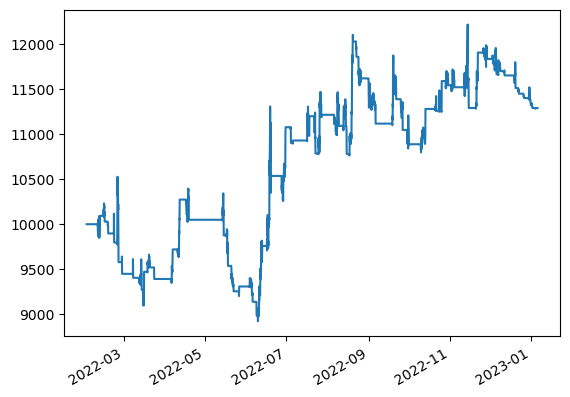

In [140]:
port.value().plot()  #no tp

In [141]:
# Run
port = vbt.Portfolio.from_signals(df.Close,
                                       entries = long_entries,
                                       exits = long_exits,
                                       short_entries = short_entries,
                                       short_exits = short_exits,
                                       freq = '1h',
                                       init_cash = 10000,
                                       sl_stop= df['sl_stop'],
                                       tp_stop= df['sl_stop'],
                                       fees = 0.0007,
                                       slippage = 0.00)

<AxesSubplot:>

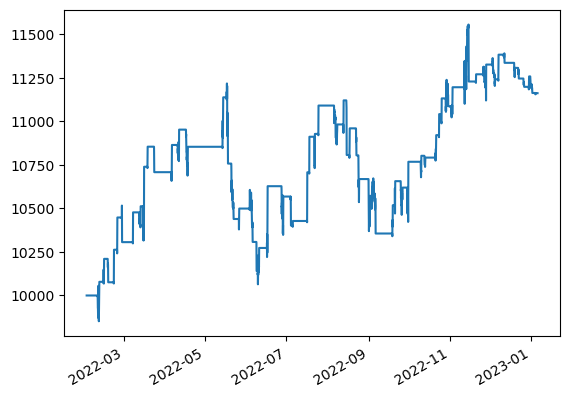

In [142]:
port.value().plot()  #with tp

# mar and apr drawdown is reduce

In [143]:
port.plot().show()

In [144]:
port.stats()

Start                               2022-02-01 00:00:00
End                                 2023-01-05 16:40:00
Period                                338 days 18:00:00
Start Value                                     10000.0
End Value                                  11162.109043
Total Return [%]                               11.62109
Benchmark Return [%]                         -56.081579
Max Gross Exposure [%]                            100.0
Total Fees Paid                             1429.352019
Max Drawdown [%]                              10.283617
Max Drawdown Duration                 164 days 22:00:00
Total Trades                                         95
Total Closed Trades                                  95
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                  45.263158
Best Trade [%]                                 4.031144
Worst Trade [%]                               -2

# let try something more


In [145]:
df = data.copy()

In [153]:
# Initial Indicator
df['fast_ema'] = df.ta.ema(12)
df['slow_ema'] = df.ta.ema(26)
df['trend_ema'] = df.ta.ema(50)

# Define Signal
long_trigger = df['fast_ema'].vbt.crossed_above(df['slow_ema']) # Condition 1
long_filter = df['fast_ema'] > df['trend_ema'] # Condition 2

short_trigger = df['fast_ema'].vbt.crossed_below(df['slow_ema']) # Condition 1
short_filter = df['fast_ema'] < df['trend_ema'] # Condition 2

# Entry Signal
long_entries = long_trigger & long_filter
short_entries = short_trigger & short_filter

# -----------------
# Define Signal
# 1. ออกเมื่ือเส้น fast ตัดเส้น slow
# 2. ออกเมื่อ ATR ทะลุ 2 std

df['atr'] = df.ta.atr()
sma = df['atr'].rolling(20).mean()
std = df['atr'].rolling(20).std()
df['atr_upperband'] = sma + std * 2

atr_exit = df['atr']>df['atr_upperband']
exitshort_1 = df['fast_ema'].vbt.crossed_above(df['slow_ema'])
exitlong_1 = df['fast_ema'].vbt.crossed_below(df['slow_ema'])

# Exit signal
long_exits = exitlong_1 | atr_exit
short_exits = exitshort_1 | atr_exit

atr_multiply = 2

df['sl_stop'] = (df['atr'] * atr_multiply) / df.Close # vbtรับค่าหน่วยเป็นpercentage เลยต้องหารราคาปิด

<AxesSubplot:>

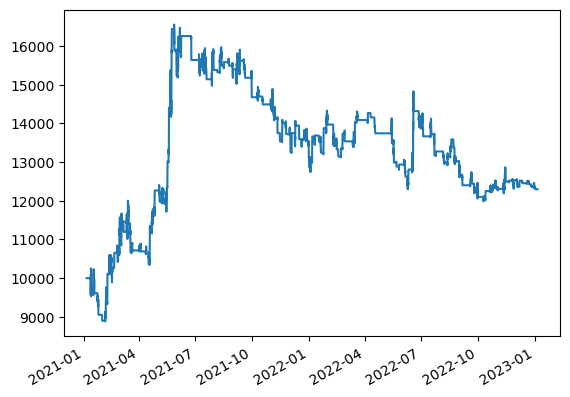

In [154]:
# Run
port = vbt.Portfolio.from_signals(df.Close,
                                       entries = long_entries,
                                       exits = long_exits,
                                       short_entries = short_entries,
                                       short_exits = short_exits,
                                       freq = '1h',
                                       init_cash = 10000,
                                       sl_stop= df['sl_stop'],
                                       fees = 0.001,
                                       slippage = 0.0005)

port.value().plot() 

In [155]:
port.stats()

Start                         2021-01-06 00:00:00
End                           2023-01-05 16:40:00
Period                          720 days 10:00:00
Start Value                               10000.0
End Value                            12298.439237
Total Return [%]                        22.984392
Benchmark Return [%]                    -50.50791
Max Gross Exposure [%]                      100.0
Total Fees Paid                       4897.575923
Max Drawdown [%]                        27.611284
Max Drawdown Duration           581 days 04:00:00
Total Trades                                  187
Total Closed Trades                           187
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            38.502674
Best Trade [%]                          14.122739
Worst Trade [%]                         -5.003718
Avg Winning Trade [%]                    2.621315
Avg Losing Trade [%]                    -1.403617


In [151]:
trade_log = port.trades.records_readable
trade_log

Exit Trade Id  Column      Size     Entry Timestamp  Avg Entry Price  \
0                0       0  0.297998 2021-01-12 13:00:00     33523.753176   
1                1       0  0.264537 2021-01-16 19:00:00     36427.039088   
2                2       0  0.302801 2021-01-23 12:00:00     31715.081792   
3                3       0  0.290080 2021-01-24 15:00:00     31968.738104   
4                4       0  0.261677 2021-01-30 22:00:00     34558.798107   
..             ...     ...       ...                 ...              ...   
195            195       0  0.621713 2022-12-26 02:00:00     16900.156793   
196            196       0  0.629828 2022-12-30 03:00:00     16593.310522   
197            197       0  0.630002 2022-12-31 06:00:00     16541.929976   
198            198       0  0.627408 2022-12-31 09:00:00     16542.952901   
199            199       0  0.625093 2022-12-31 23:00:00     16539.579589   

     Entry Fees      Exit Timestamp  Avg Exit Price  Exit Fees         PnL  \
0      9.990010 2021-01-13 15:00:00    34643.692096  10.323750 -354.053271   
1      9.636310 2021-01-18 09:00:00    36478.824047   9.650009  -32.985373   
2      9.603358 2021-01-24 04:00:00    32741.148438   9.914052 -330.211401   
3      9.273476 2021-01-25 00:00:00    32698.519531   9.485171 -230.453300   
4      9.043253 2021-01-31 00:00:00    34042.915340   8.908259 -152.946328   
..          ...                 ...             ...        ...         ...   
195   10.507046 2022-12-26 14:00:00    16843.560547  10.471859  -56.165521   
196   10.450936 2022-12-31 00:00:00    16606.973165  10.459541  -29.515596   
197   10.421450 2022-12-31 07:00:00    16575.967436  10.442894  -42.308014   
198   10.379184 2022-12-31 10:00:00    16574.306449  10.398856  -40.449513   
199   10.338775 2023-01-01 17:00:00    16594.642784  10.373195  -55.131587   

       Return Direction  Status  Position Id  
0   -0.035441     Short  Closed            0  
1   -0.003423     Short  Closed            1  
2   -0.034385     Short  Closed            2  
3   -0.024851     Short  Closed            3  
4   -0.016913      Long  Closed            4  
..        ...       ...     ...          ...  
195 -0.005346      Long  Closed          195  
196 -0.002824     Short  Closed          196  
197 -0.004060     Short  Closed          197  
198 -0.003897     Short  Closed          198  
199 -0.005333     Short  Closed          199  

[200 rows x 14 columns]

<AxesSubplot:>

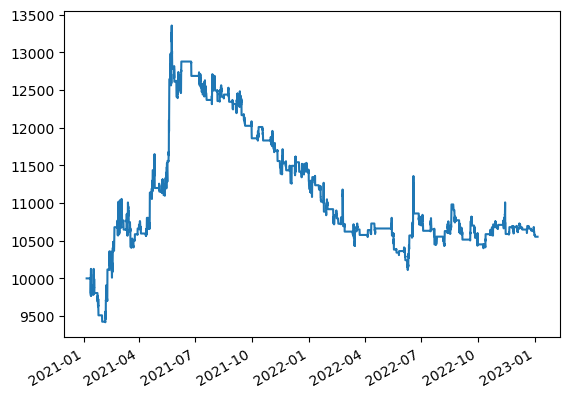

In [152]:
# Run this section edit rolling atr std sma to 50

port = vbt.Portfolio.from_signals(df.Close,
                                       entries = long_entries,
                                       exits = long_exits,
                                       short_entries = short_entries,
                                       short_exits = short_exits,
                                       freq = '1h',
                                       init_cash = 10000,
                                      sl_stop= df['sl_stop'],
                                       size = 5000,
                                       size_type ='Value',
                                       fees = 0.001,
                                       slippage = 0.0005)

port.value().plot() 